In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Sangjune/AI_git/ai/sources/Day7/bank-additional/bank-additional/bank-additional-full.csv",sep=';')
data = df.drop('duration',axis=1)
test = pd.read_csv("C:/Users/Sangjune/AI_git/ai/sources/Day7/bank-additional/bank-additional/bank-additional.csv",sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E0D4162E8>,
      dtype=object)

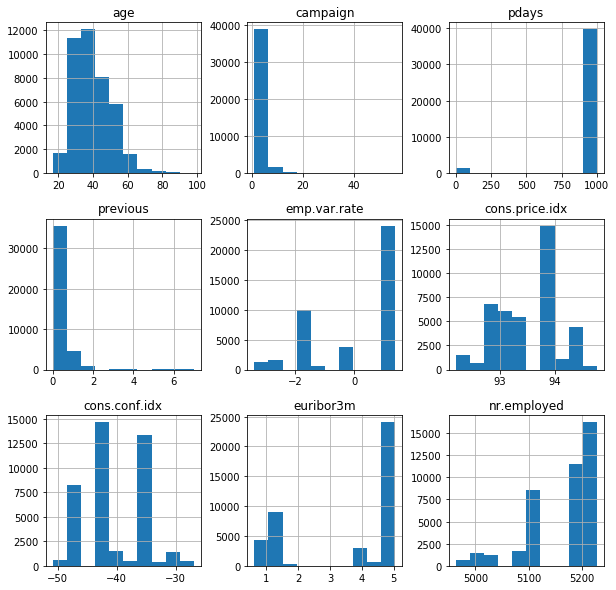

In [4]:
header = ["age","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
data.hist(column=header , figsize=(10,10))



In [5]:
X = pd.DataFrame(df[header])
print(X)
Y =pd.DataFrame(data[:]['y'])
print(Y)

Xt = pd.DataFrame(test[header])
Yt =pd.DataFrame(test[:]['y'])

       age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56         1    999         0           1.1          93.994   
1       57         1    999         0           1.1          93.994   
2       37         1    999         0           1.1          93.994   
3       40         1    999         0           1.1          93.994   
4       56         1    999         0           1.1          93.994   
...    ...       ...    ...       ...           ...             ...   
41183   73         1    999         0          -1.1          94.767   
41184   46         1    999         0          -1.1          94.767   
41185   56         2    999         0          -1.1          94.767   
41186   44         1    999         0          -1.1          94.767   
41187   74         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  
0              -36.4      4.857       5191.0  
1              -36.4      4.857       5191.0  
2     

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
Xt_scaled = scaler.transform(Xt)

C:\Users\Sangjune\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sangjune\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sangjune\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [8]:
X_scaled

array([[ 1.53303429, -0.56592197,  0.1954139 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323, -0.56592197,  0.1954139 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564, -0.56592197,  0.1954139 , ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429, -0.20490853,  0.1954139 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696, -0.56592197,  0.1954139 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.15610492,  0.1954139 , ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [9]:
print("조정 전 속성 별 최소값 :\n",X.min(axis=0))
print("조정 전 속성 별 최대값 :\n",X.max(axis=0))
print("조정 후 속성 별 최소값 :\n",X_scaled.min(axis=0))
print("조정 후 속성 별 최대값 :\n",X_scaled.max(axis=0))

조정 전 속성 별 최소값 :
 age                 17.000
campaign             1.000
pdays                0.000
previous             0.000
emp.var.rate        -3.400
cons.price.idx      92.201
cons.conf.idx      -50.800
euribor3m            0.634
nr.employed       4963.600
dtype: float64
조정 전 속성 별 최대값 :
 age                 98.000
campaign            56.000
pdays              999.000
previous             7.000
emp.var.rate         1.400
cons.price.idx      94.767
cons.conf.idx      -26.900
euribor3m            5.045
nr.employed       5228.100
dtype: float64
조정 후 속성 별 최소값 :
 [-2.20936452 -0.56592197 -5.1494434  -0.34949428 -2.21643348 -2.37488933
 -2.22495344 -1.72235092 -2.8156966 ]
조정 후 속성 별 최대값 :
 [ 5.56330992 19.28981766  0.1954139  13.79491813  0.83906065  2.05816805
  2.93910628  0.82085307  0.84517009]


In [10]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_scaled,Y)

C:\Users\Sangjune\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
print(svm.score(X_scaled,Y))

0.9003107701272215


In [12]:
print(svm.score(Xt_scaled,Yt))


0.9031318281136198
